<a href="https://colab.research.google.com/github/Shanzayousaf/classification-and-regression/blob/main/Classify_Spotify_Songs_by_Mood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn librosa

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/My Drive/dataset.csv'
data = pd.read_csv(file_path)
print(data.head())



   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [5]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
data.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name','popularity', 'duration_ms', 'explicit',], inplace=True)

In [7]:
data.columns

Index(['track_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler

features = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
X = data[features]
X_scaled = StandardScaler().fit_transform(X)
Y = data['track_genre']


In [9]:
def classify_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6:
        return "Happy"
    elif row['valence'] < 0.4 and row['energy'] < 0.4:
        return "Sad"
    elif row['valence'] > 0.6 and row['energy'] < 0.4:
        return "Peaceful"
    elif row['valence'] < 0.4 and row['energy'] > 0.6:
        return "Angry"
    elif row['energy'] > 0.6:
        return "Energetic"
    elif row['valence'] > 0.6:
        return "Calm"
    else:
        return "Neutral"

data['mood'] = data.apply(classify_mood, axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.2326315789473684
                   precision    recall  f1-score   support

         acoustic       0.15      0.15      0.15       213
         afrobeat       0.23      0.19      0.21       203
         alt-rock       0.03      0.02      0.02       215
      alternative       0.13      0.14      0.14       184
          ambient       0.21      0.20      0.21       197
            anime       0.12      0.08      0.10       193
      black-metal       0.35      0.40      0.37       210
        bluegrass       0.30      0.39      0.33       205
            blues       0.14      0.11      0.12       214
           brazil       0.01      0.01      0.01       197
        breakbeat       0.28      0.24      0.26       199
          british       0.10      0.05      0.06       214
         cantopop       0.19      0.22      0.20       193
    chicago-house       0.38      0.47      0.42       206
         children       0.34      0.30      0.32       214
            chill       0.

<ipython-input-13-841f83c2e794>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mood', data=data, palette='viridis')


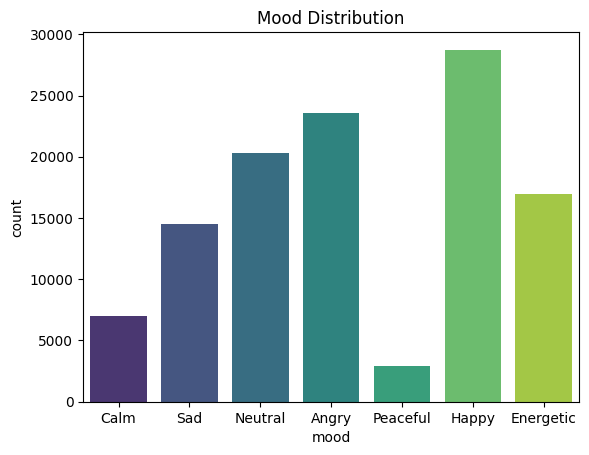

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='mood', data=data, palette='viridis')
plt.title("Mood Distribution")
plt.show()


In [14]:
# prompt: predict new songs using trained data

import pandas as pd
import numpy as np

new_song_data = pd.DataFrame([[0.7, 0.8, 0, 0, 0, 0, 0, 0, 0, 0.9, 120, 0]],
                             columns=features)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
new_song_scaled = scaler.transform(new_song_data)


# Predict the mood of the new song
predictions = model.predict(new_song_scaled)
print(predictions)


# You can add the predicted mood back to your DataFrame
new_song_data['predicted_mood'] = predictions
new_song_data

['punk-rock']


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,predicted_mood
0,0.7,0.8,0,0,0,0,0,0,0,0.9,120,0,punk-rock


In [15]:
new_songs_data = pd.DataFrame({
    'danceability': [0.7, 0.4, 0.9, 0.5, 0.6],
    'energy': [0.8, 0.2, 0.7, 0.9, 0.3],
    'key': [0, 5, 10, 2, 7],
    'loudness': [0, -5, -2, 0, -3],
    'mode': [0, 1, 0, 1, 0],
    'speechiness': [0.1, 0.05, 0.2, 0.01, 0.15],
    'acousticness': [0.1, 0.8, 0.05, 0.2, 0.6],
    'instrumentalness': [0, 0.9, 0.01, 0.1, 0.05],
    'liveness': [0.2, 0.1, 0.3, 0.05, 0.25],
    'valence': [0.9, 0.3, 0.7, 0.6, 0.4],
    'tempo': [120, 90, 130, 110, 85],
    'time_signature': [4, 4, 4, 3, 4]
})

# Scale the new song data using the same scaler fitted on the training data
new_songs_scaled = scaler.transform(new_songs_data)

# Predict the genre of the new songs
predictions = model.predict(new_songs_scaled)
print(predictions)

# Add predictions to the DataFrame
new_songs_data['predicted_genre'] = predictions
new_songs_data

['dance' 'guitar' 'latino' 'j-idol' 'show-tunes']


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,predicted_genre
0,0.7,0.8,0,0,0,0.10,0.10,0.00,0.20,0.9,120,4,dance
1,0.4,0.2,5,-5,1,0.05,0.80,0.90,0.10,0.3,90,4,guitar
2,0.9,0.7,10,-2,0,0.20,0.05,0.01,0.30,0.7,130,4,latino
3,0.5,0.9,2,0,1,0.01,0.20,0.10,0.05,0.6,110,3,j-idol
4,0.6,0.3,7,-3,0,0.15,0.60,0.05,0.25,0.4,85,4,show-tunes
